# <center><span style="color:green">**Building a Random Forest model for Marketing**</span></center>

## <span style='color:green'>1. Importing the libraries</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from Mongo_DB import Mongo_DB

## <span style='color:green'>2. Using Mongo_DB Class to retrieve Data</span>

In [2]:
My_Database= Mongo_DB()

In [3]:
databases= My_Database.show_databases()

In [4]:
databases

['Bank_DB',
 'Marketing_DB',
 'mongodbVSCodePlaygroundDB',
 'sample_mflix',
 'admin',
 'local']

In [5]:
My_Database.db = "Marketing_DB"

# See collections
My_Database.show_collections()

# Select a collection
My_Database.collection = "clients"

In [6]:
My_Database.show_collections()

['Customers']

In [7]:
My_Database.collection

Collection(Database(MongoClient(host=['ac-wnmyzvm-shard-00-02.cbjgzx2.mongodb.net:27017', 'ac-wnmyzvm-shard-00-00.cbjgzx2.mongodb.net:27017', 'ac-wnmyzvm-shard-00-01.cbjgzx2.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, appname='Cluster0', authsource='admin', replicaset='atlas-kt2but-shard-0', tls=True), 'Marketing_DB'), 'clients')

In [8]:
My_Database.collection= "Customers"

In [9]:
head= My_Database.fetch(None, None, 5)
head

[{'_id': ObjectId('691a3d0bdb2e35b03baa1e70'),
  'ID': 5524,
  'Year_Birth': 1957,
  'Education': 'Graduation',
  'Marital_Status': 'Single',
  'Income': 58138,
  'Kidhome': 0,
  'Teenhome': 0,
  'Dt_Customer': '04-09-2012',
  'Recency': 58,
  'MntWines': 635,
  'MntFruits': 88,
  'MntMeatProducts': 546,
  'MntFishProducts': 172,
  'MntSweetProducts': 88,
  'MntGoldProds': 88,
  'NumDealsPurchases': 3,
  'NumWebPurchases': 8,
  'NumCatalogPurchases': 10,
  'NumStorePurchases': 4,
  'NumWebVisitsMonth': 7,
  'AcceptedCmp3': 0,
  'AcceptedCmp4': 0,
  'AcceptedCmp5': 0,
  'AcceptedCmp1': 0,
  'AcceptedCmp2': 0,
  'Complain': 0,
  'Z_CostContact': 3,
  'Z_Revenue': 11,
  'Response': 1},
 {'_id': ObjectId('691a3d0bdb2e35b03baa1e71'),
  'ID': 2174,
  'Year_Birth': 1954,
  'Education': 'Graduation',
  'Marital_Status': 'Single',
  'Income': 46344,
  'Kidhome': 1,
  'Teenhome': 1,
  'Dt_Customer': '08-03-2014',
  'Recency': 38,
  'MntWines': 11,
  'MntFruits': 1,
  'MntMeatProducts': 6,
  'Mnt

In [13]:
df1= My_Database.to_dataframe(None, None)
df1.head()

,_id,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,691a3d0bdb2e35b03baa1e70,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,691a3d0bdb2e35b03baa1e71,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,691a3d0bdb2e35b03baa1e72,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,691a3d0bdb2e35b03baa1e73,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,691a3d0bdb2e35b03baa1e74,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  2240 non-null   object 
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## <span style='color:green'>3. Retrieve of data using a built **wrangle** function</span>

In [22]:
def wrangle(filepath):
    df= pd.read_csv(filepath)
    
    columns= df.columns.str.split(r"\t", expand=False)
    new_cols= []
    for i in columns:
        for j in i:
            new_cols.append(j)

    df= df.iloc[:,0].str.split(r"\t", expand=True)
    df.columns= new_cols
    #df= df.dropna()

    #Converting nnumber based columns to int64 type that can accept NaN
    cols_to_convert = [
     'ID','Income', 'Year_Birth', 'Kidhome','Teenhome','Recency','MntWines','MntFruits',
     'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
     'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
     'NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1',
     'AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response'
    ]
    
    # Secured conversion
    for col in cols_to_convert:
        df[col] = pd.to_numeric(df[col], errors="coerce")  # force conversion to float and gives NaN when there's no answer
        df[col] = df[col].astype("Int64")  # Integer type and accepts Nan
    
    #Filling the Na values with the mean
    df["Income"]= df["Income"].fillna(df["Income"].mean().round())
    
    #Converting date based columns to datetime type
    df["Dt_Customer"]= pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y", errors= "coerce")

    #Creating new columns based on datetime columns
    df["Age"] = 2025 - df["Year_Birth"]
    df["Customer_For"] = (pd.Timestamp.today() - df["Dt_Customer"]).dt.days

    df["Total_Spending"] = (
        df["MntWines"] +
        df["MntFruits"] +
        df["MntMeatProducts"] +
        df["MntFishProducts"] +
        df["MntSweetProducts"] +
        df["MntGoldProds"]
    )
    df["Total_Purchases"] = (
        df["NumDealsPurchases"] +
        df["NumWebPurchases"] +
        df["NumCatalogPurchases"] +
        df["NumStorePurchases"]
    )

    df["children"]= df["Kidhome"]+df["Teenhome"]
    
    # Dropping columns that do not contribute to the model's performance
    df= df.drop(columns= ["Z_CostContact", "Z_Revenue"])

    return df

In [3]:
df= wrangle("c:/Users/USER/Videos/Science/datasets/Marketing/marketing_campaign.csv")
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_For',
       'Total_Spending', 'Total_Purchases', 'children'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   Int64         
 1   Year_Birth           2240 non-null   Int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   Int64         
 5   Kidhome              2240 non-null   Int64         
 6   Teenhome             2240 non-null   Int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   Int64         
 9   MntWines             2240 non-null   Int64         
 10  MntFruits            2240 non-null   Int64         
 11  MntMeatProducts      2240 non-null   Int64         
 12  MntFishProducts      2240 non-null   Int64         
 13  MntSweetProducts     2240 non-nul

## <span style='color:green'>4. Interprating graphs and data from the dataframe</span>

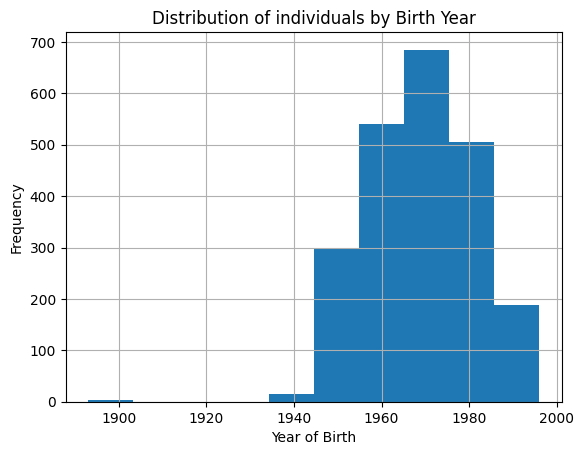

In [5]:
df["Year_Birth"].hist()
plt.xlabel("Year of Birth")
plt.ylabel("Frequency")
plt.title("Distribution of individuals by Birth Year");

<span style='color:white'>**Comment**: We can see from the graph that most of the client were born in the range of 1960 and 1980 year. A small part of them was born in 1900, their data will be dropped during training because it's a noise for our model. The recent clients that we can get are from the year 2000.</span>

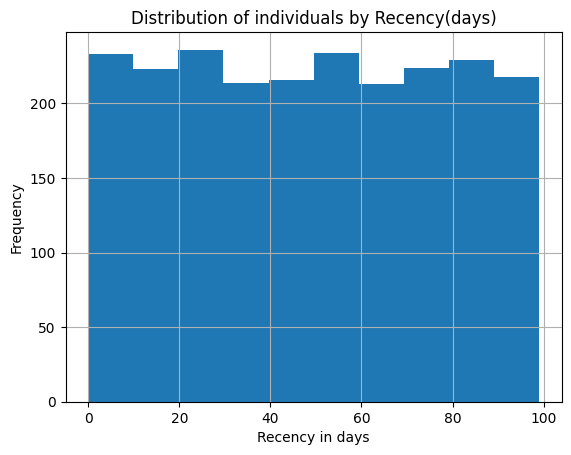

In [21]:
df["Recency"].sort_values().hist()
plt.xlabel("Recency in days")
plt.ylabel("Frequency")
plt.title("Distribution of individuals by Recency(days)");

<Axes: xlabel='Recency'>

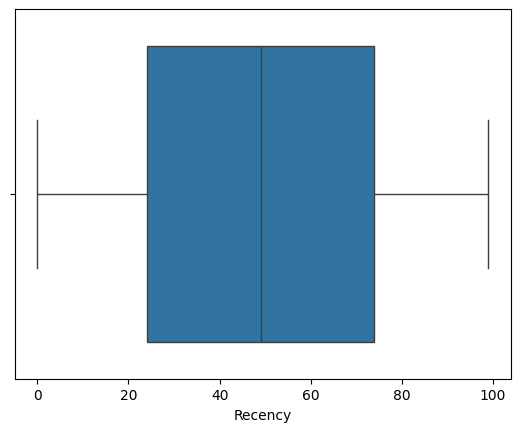

In [20]:
sns.boxplot(x= df['Recency'])

In [10]:
df["Recency"].value_counts(normalize=True).max()

0.016517857142857143

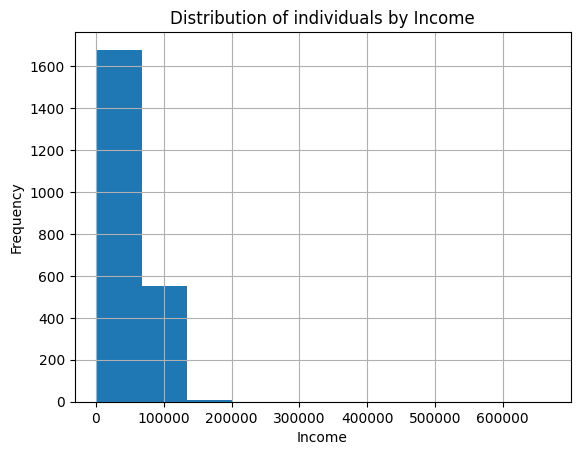

In [8]:
df["Income"].hist()
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of individuals by Income");

<span style='color:white'>**Comment**: The income was measured in *x* currency. The most income is between 100 and 200k. A big range of our customers have an income which is less than 100k.</span>

<Axes: xlabel='MntGoldProds'>

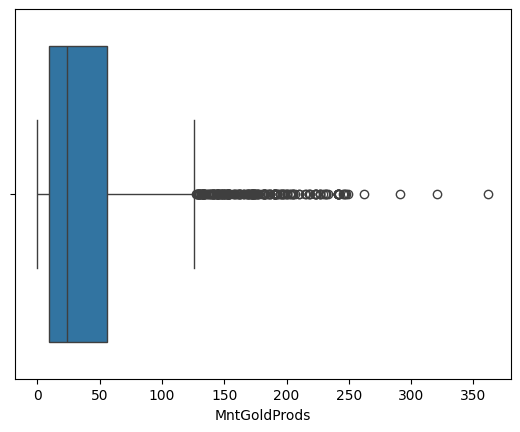

In [6]:
sns.boxplot(x=df["MntGoldProds"])

<span style='color:white'>**Comment**: This graph is skewed. This tells us that most of the clients don't have big amount of gold products.</span>

<Axes: xlabel='MntWines'>

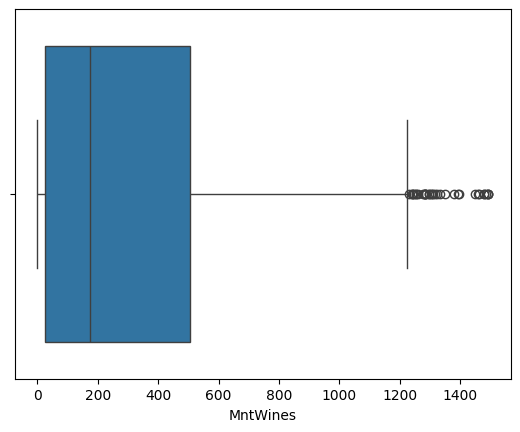

In [7]:
sns.boxplot(x=df["MntWines"])

<span style='color:white'>**Comment**: This one also is skewed but it shows that the clients like to buy big amounts of wines. Maybe we could launch a wine campaign to encourage them and get a positive outcome.</span>

In [28]:
 df["Kidhome"].value_counts(normalize=True).round(2)

Kidhome
0    0.58
1    0.40
2    0.02
Name: proportion, dtype: float64

<span style='color:white'>**Comment**: We can see from these results that most of the clients have 1 child or none at all.</span>

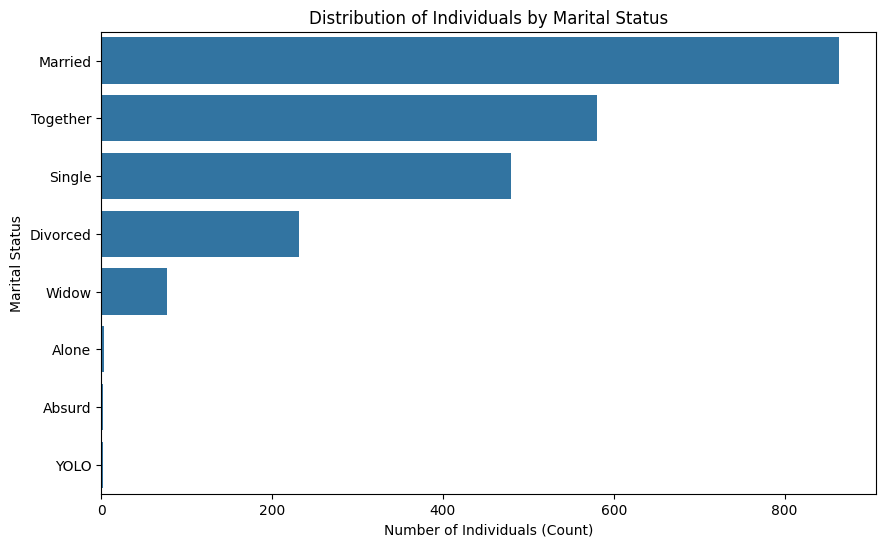

In [10]:
plt.figure(figsize=(10, 6))


sns.countplot(
    data=df,
    y="Marital_Status", 
    order=df["Marital_Status"].value_counts().index
)

plt.title("Distribution of Individuals by Marital Status")
plt.xlabel("Number of Individuals (Count)")
plt.ylabel("Marital Status");

<span style='color:white'>**Comment**: A big part of the clients are also married or in a relationship. Maybe we should launch a campaign targeting those clients.</span>

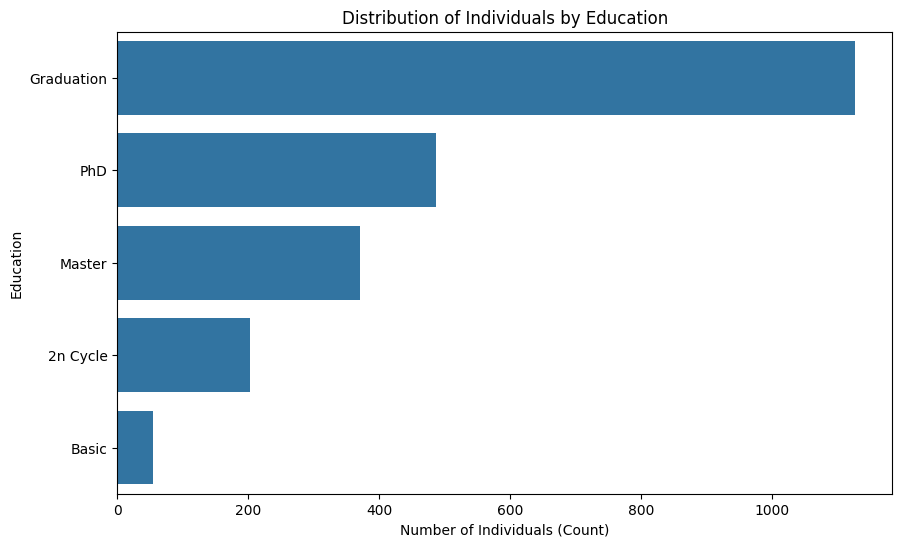

In [14]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    y="Education",
    order=df["Education"].value_counts().index
)

plt.title("Distribution of Individuals by Education")
plt.xlabel("Number of Individuals (Count)")
plt.ylabel("Education");

<span style='color:white'>**Comment**: Another thing to add is that most of the clients have an undergraduate degree. Which is a good thing because it shows us that we're having educated clients.</span>

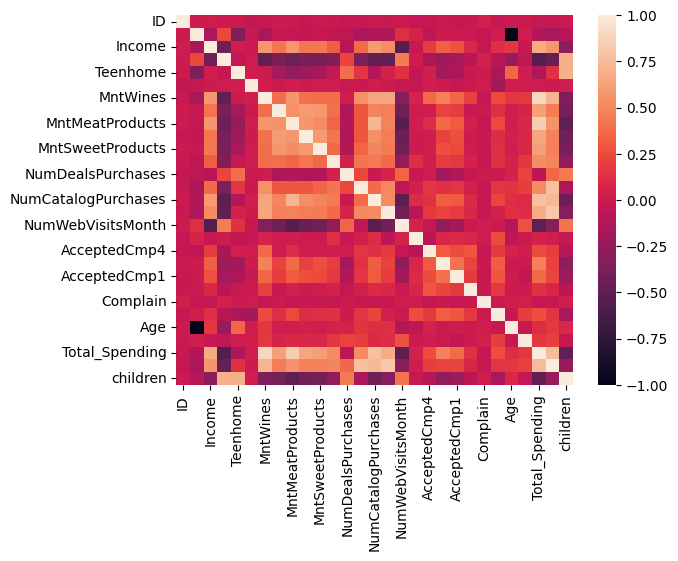

In [12]:
sns.heatmap(df.select_dtypes("Int64").corr());

In [31]:
df["Complain"].value_counts(normalize=True)

Complain
0    0.990625
1    0.009375
Name: proportion, dtype: float64

<span style='color:white'>**Comment**: A positive thing to notice is that the clients don't complain at all about the services that we deliver to them.</span>